<style type="text/css">

div.h2 {
    background-color: steelblue; 
    color: white; 
    padding: 8px; 
    padding-right: 300px; 
    font-size: 24px; 
    max-width: 1500px; 
    margin-top: 50px;
    margin-bottom:4px;
}
    
body {
  font-size: 12px;
}    
     
                                    
                                      
div.h3 {
    color: #159957; 
    font-size: 18px; 
    margin-top: 20px; 
    margin-bottom:4px;
}
   
                                      
div.h1 {
    background-color: steelblue; 
    color: white;
    padding: 8px; 
    padding-right: 300px; 
    font-size: 32px; 
    margin-top: 20px; 
    max-width: 1500px;
    margin-bottom: 8px;
}    
</style>    
 

<div class=h1> Understand about the host</div>

[Chai Time Data science show](https://chaitimedatascience.com/) is a podcast series hosted by [Sanyam Bhutani.](https://www.kaggle.com/init27).This show features interviews researchers, practitioners and Kagglers in Data science community.


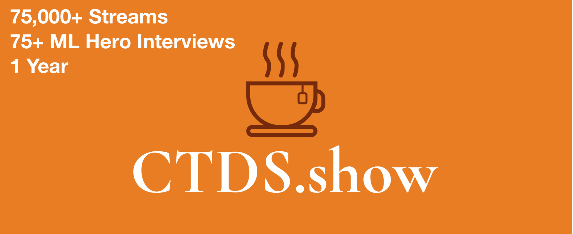

I personally have been watching Chai time data science show regularly. It has helped me a lot while learning new concepts & approaching practically new
problems with insights gained from this interviews.

In this notebook we will be looking to learn more about Sanyanam Bhutani who is the host of Chai time datascience. Sanyanam calls himself a community-made data scientist. He is currently working as ML Engineer and Content creator at H20.ai. Sanyam is a avid kaggler and proud fastai student.
<hr>

<div class=h2> Importing Libraries</div>

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from PIL import Image
import re
import datetime 




from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)

from collections import Counter
from tqdm.notebook import tqdm
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
from wordcloud import WordCloud
plt.style.use('ggplot')
stop=set(stopwords.words('english'))
from nltk.tokenize import word_tokenize

color = sns.color_palette()
%matplotlib inline

In [2]:
episode = pd.read_csv('../input/chai-time-data-science/Episodes.csv')
desc = pd.read_csv('../input/chai-time-data-science/Description.csv')
ctds_episodes = episode[episode['episode_id'].str.match('E')]
ctds_episodes = ctds_episodes.drop([0])

<div class=h2> Happy birtday host</div>

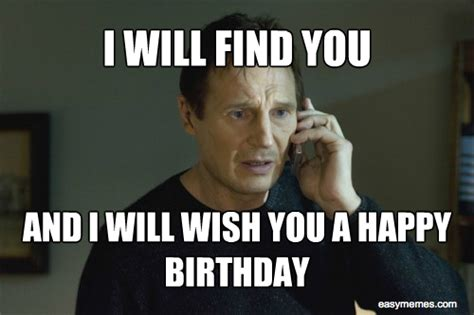



In [3]:
episode[episode['episode_id']=="E69"]["release_date"]

78    2020-05-27
Name: release_date, dtype: object

- Sanyanam conduct a special Ask me anything episode on his birthay, on finding that episode. We are able to see his birthay is 27th May.
- Our host said he had turned into ago of 23 during that episode. So his DOB is: (27/05/1997)

<div class=h3> When is the first anniversary of CTDS show ❓</div>

In [4]:
episode[episode['episode_id']=="E0"]["release_date"]

0    2019-07-21
Name: release_date, dtype: object

> So the first anniversary of CTDS show is on July 21st, 2020.

<div class=h2> Episode 1: Abhishek Thakur </div>
    
<div class=h3> No of times spoken</div>

Text(0, 0.5, 'Times spoken')

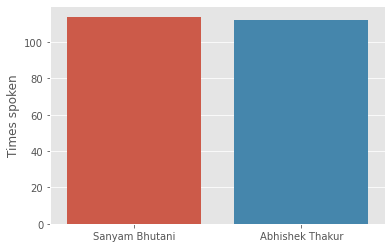

In [5]:
episode_1 = pd.read_csv('../input/chai-time-data-science/Cleaned Subtitles/E1.csv')
x=episode_1.Speaker.value_counts()
sns.barplot(x.index, x)
plt.gca().set_ylabel('Times spoken')

<div class=h3>Number of Characters in Episode1</div>

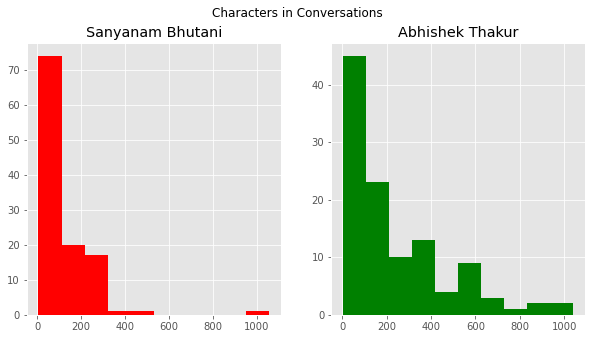

In [6]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
sany_len = episode_1[episode_1["Speaker"]=="Sanyam Bhutani"]["Text"].str.len()
ax1.hist(sany_len,color='red')
ax1.set_title('Sanyanam Bhutani')
abhi_len = episode_1[episode_1["Speaker"]=="Abhishek Thakur"]["Text"].str.len()
ax2.hist(abhi_len,color='green')
ax2.set_title('Abhishek Thakur')
fig.suptitle('Characters in Conversations')
plt.show()


<div class=h3>Number of words in the Episode1 </div>

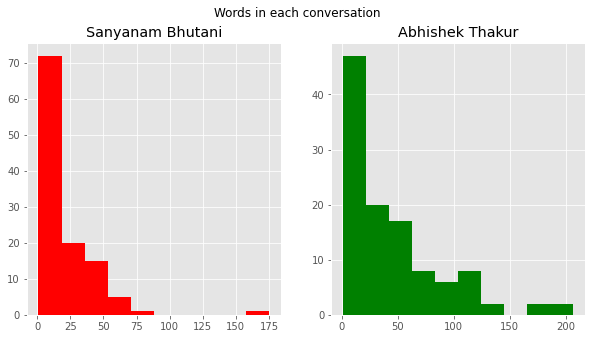

In [7]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
sany_len = episode_1[episode_1["Speaker"]=="Sanyam Bhutani"]["Text"].str.split().map(lambda x: len(x))
ax1.hist(sany_len,color='red')
ax1.set_title('Sanyanam Bhutani')
abhi_len = episode_1[episode_1["Speaker"]=="Abhishek Thakur"]["Text"].str.split().map(lambda x: len(x))
ax2.hist(abhi_len,color='green')
ax2.set_title('Abhishek Thakur')
fig.suptitle('Words in each conversation')
plt.show()

<div class=h2> Social proof</div>

- It's very important in current world to have a very vibrant social profile to have success in the field you are working on.
- Sanyam has more views in platform youtube from external links than people organically watching his videos in youtube which is a sign of his social profile sucess.

In [8]:
no_twitter_followers = 8613 #from twitter profile https://twitter.com/bhutanisanyam1/ as on 10-July
no_subscriber = episode['youtube_subscribers'].sum() + 863
# add kaggle followers
no_kaggle_followers = 416
no_blogpost_views = 1000000

fig = go.Figure()

fig.add_trace(go.Indicator(
    title = 'Twitter Followers',
    mode = "number",
    value = no_twitter_followers,
    domain = {'row': 0, 'column': 0}))


fig.add_trace(go.Indicator(
    title = "Youtube subscriber",
    mode = "number",
    value = no_subscriber,
    domain = {'row': 0, 'column': 1}))

fig.add_trace(go.Indicator(
    title = 'Total user visits of Sanyam blogs',
    mode = "number",
    value = no_blogpost_views,
    domain = {'row': 1, 'column': 0}))

fig.add_trace(go.Indicator(
    title = 'Kaggle Followers',
    mode = "number",
    value = no_kaggle_followers,
    domain = {'row': 1, 'column': 1}))



fig.update_layout(width=700,height=400,title='<b>Social profile of Sanyam Bhutani</b>',
                  template='seaborn',margin=dict(t=60,b=10,l=10,r=10),
                  grid = {'rows': 2, 'columns': 2, 'pattern': "independent"},paper_bgcolor='#99ff66')

<div class=h3> What are the future plans for Chai time data science?</div>

Given below is the exact question which was asked in the AMA episode by Kaggle grandmaster, Rohan.
- what are the top enhancements or changes you're working on for CTDS? Anything to look forward to, in the near future?

In [9]:
ama_episode = pd.read_csv('../input/chai-time-data-science/Cleaned Subtitles/E69.csv')
ama_episode['Text'][1]

'The next question is from Rohan Rao who\'s a data scientist at h2o Kaggle Grand Master and also worldwide known sodoku champion, what are the top enhancements or changes you\'re working on for CTDS? Anything to look forward to, in the near future? Uh funny story. The branding idea of CTDS actually came from Rohan, thanks to his suggestion. And yes, there are a lot of exciting things that I am I\'ve been working on. So three things. I\'m launching a new podcast. Yes, a new podcast called "Chai Time Data Science News" CTDS.news. You can find another write up that will live with this blog post. You can read all about it. But the idea is to give you a short news podcast, ideally in three to five minutes, always less than 10 minutes for you to be able to be on top of data science news, basically. Now if you know me, I am completely community driven. So if you have any thoughts around around that, please let me know the first episode is supposed to go live somewhere in the first week of Jun

> There are a lot of exciting things that I am I\'ve been working on. So three things. I\'m launching a new podcast. Yes, a new podcast called "Chai Time Data Science News" CTDS.news. You can find another write up that will live with this blog post. You can read all about it. But the idea is to give you a short news podcast, ideally in three to five minutes, always less than 10 minutes for you to be able to be on top of data science news, basically. Now if you know me, I am completely community driven. So if you have any thoughts around around that, please let me know the first episode is supposed to go live somewhere in the first week of June, so in a few days from now, but we\'ll see how that goes. Secondly, you as you might know, I have been subtitling, every single one of the interview that goes out is all of the two interviews that go out and have been going on since January. And now I will be starting a blog version release of these also in the first week of June or probably before that. So you can read you can expect blog releases and also short, interesting parts of the conversation short clips. I was going to call it cutting chai shorts from "Chai Time Data Science.\' So really excited about that. I also have a new set a new camera a new mic my new look. But we\'ll see how that goes.

<div class=h2> What did Sanyam talked in most liked episodes?</div>

(not related to this analysis aspect much)

In [10]:
print(episode[episode['heroes']=='Jeremy Howard']['episode_id'])
print(episode[episode['heroes']=='Parul Pandey']['episode_id'])
print(episode[episode['heroes']=='Abhishek Thakur']['episode_id'])

27    E27
Name: episode_id, dtype: object
58    E49
Name: episode_id, dtype: object
1    E1
Name: episode_id, dtype: object


In [11]:
most_viewed_episode = ['E27.csv', 'E49.csv', 'E1.csv']
c_files = []
for f in most_viewed_episode:
    df = pd.read_csv(f'../input/chai-time-data-science/Cleaned Subtitles/{f}')
    c_files.append(df)

all_likes = pd.concat(c_files)

In [12]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
                   title = None, colormap=None, title_size=40, image_color=False):
    """Code to plot wordcloud with image mask and title.
       Adopted code from : https://www.kaggle.com/aashita/word-clouds-of-various-shapes
    """
    stopwords = stop
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown', 'I'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    colormap=colormap,
                    stopwords = stopwords,
                    max_words = max_words,
                    min_word_length=3, # Minimum numbers of letters of each word to be part of the cloud
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="gaussian");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
d = '../input/masks/masks-wordclouds/'


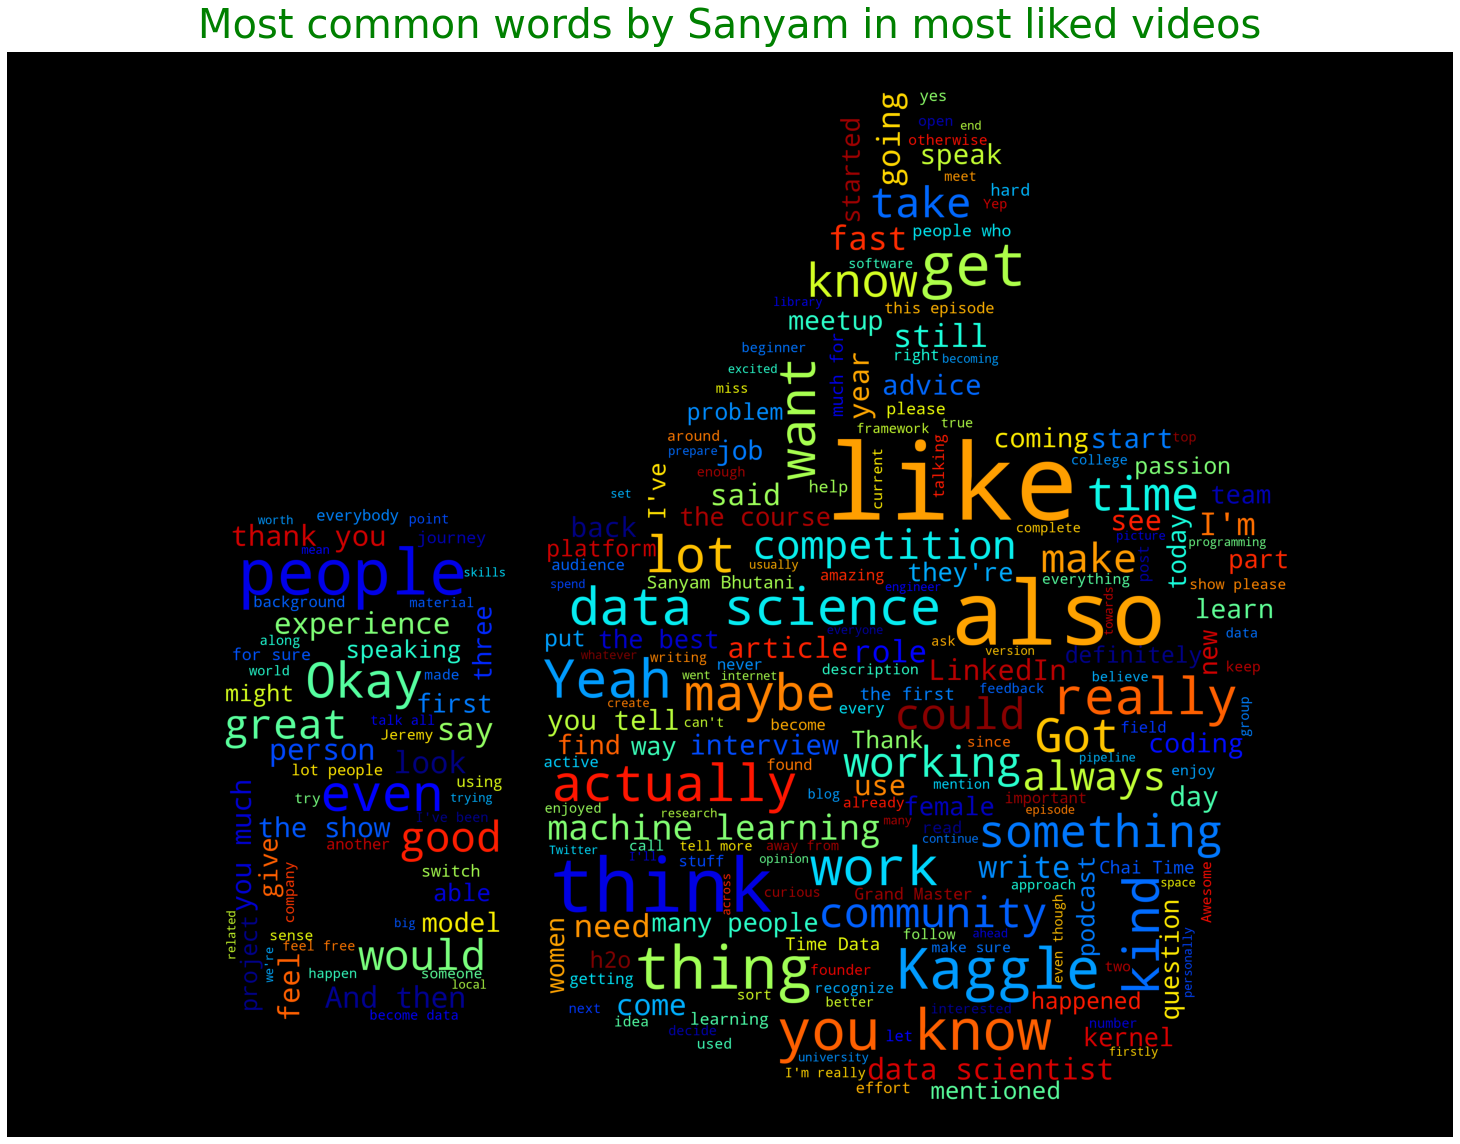

In [13]:
upvote_mask = np.array(Image.open(d + 'upvote.png'))
most_likes_text = " ".join(all_likes[all_likes['Speaker']=='Sanyam Bhutani']['Text'])
plot_wordcloud(most_likes_text, upvote_mask, max_words=250, max_font_size=300, colormap='jet',
               title = 'Most common words by Sanyam in most liked videos')

## Most common words spoken with high watch duration

In [14]:
print(episode[episode['heroes']=='Tim Dettmers']['episode_id'])
print(episode[episode['heroes']=='Jeremy Howard']['episode_id'])
print(episode[episode['heroes']=='Tuatini Godard']['episode_id'])
print(episode[episode['heroes']=='Daniel Bourke']['episode_id'])
print(episode[episode['heroes']=='Radek Osmulski']['episode_id'])



5    E5
Name: episode_id, dtype: object
27    E27
Name: episode_id, dtype: object
22    E12
Name: episode_id, dtype: object
70    E61
Name: episode_id, dtype: object
44    E44
Name: episode_id, dtype: object


In [15]:
most_avg_duration = ['E5', 'E27', 'E12', 'E61', 'E44']
c_files = []
for f in most_viewed_episode:
    df = pd.read_csv(f'../input/chai-time-data-science/Cleaned Subtitles/{f}')
    c_files.append(df)

all_likes = pd.concat(c_files)

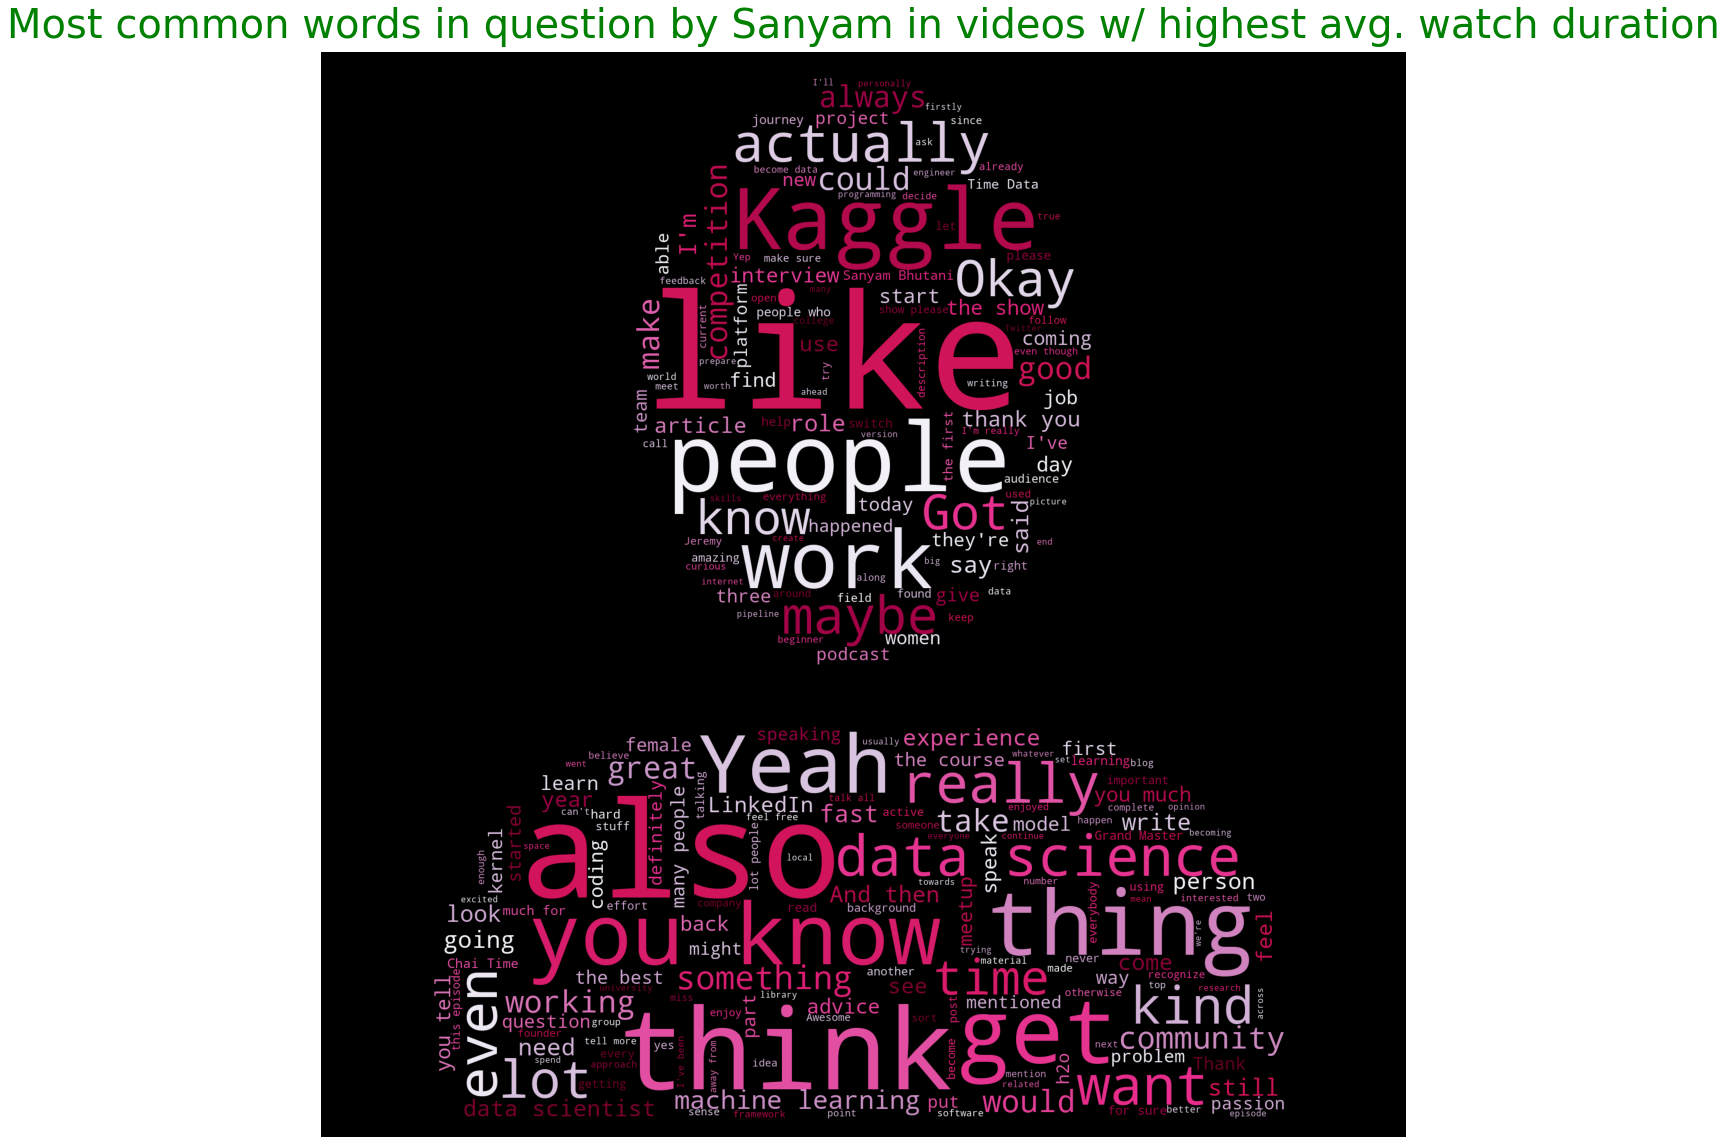

In [16]:
user = np.array(Image.open(d + 'user.png'))
most_likes_text = " ".join(all_likes[all_likes['Speaker']=='Sanyam Bhutani']['Text'])
plot_wordcloud(most_likes_text, user, max_words=250, max_font_size=300, colormap='PuRd',
               title = 'Most common words in question by Sanyam in videos w/ highest avg. watch duration')

## Commonly spoken words throughout episode by Sanyam

In [17]:
cleaned_st_files = os.listdir('../input/chai-time-data-science/Cleaned Subtitles/')

def add_duration(df):
    df['colon_count'] = df['Time'].str.count(':')
    df.loc[df['colon_count'] == 1, 'Time'] = '0:' + df.loc[df['colon_count'] == 1]['Time']
    df['Time_dt'] = df['Time'].apply(lambda x: datetime.datetime.strptime(x, "%H:%M:%S"))
    df['Duration'] = (df['Time_dt'] - datetime.datetime(1900, 1, 1)) \
        .apply(lambda x: x.total_seconds()).astype('int')
    return df

c_fs = []
for f in tqdm(cleaned_st_files):
    df = pd.read_csv(f'../input/chai-time-data-science/Cleaned Subtitles/{f}')
    df = add_duration(df)
    df['E'] = f.replace('.csv','')
    c_fs.append(df)
all_subs = pd.concat(c_fs)


In [18]:
host_subs = all_subs[all_subs['Speaker']=='Sanyam Bhutani']
host_subs['temp_list'] = host_subs['Text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in host_subs['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(50))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
1,you,5055
2,to,4779
3,a,3339
4,I,3315
5,and,2990
6,of,2940
7,that,2269
8,in,2071
9,for,1967
10,this,1499


In [19]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

<div class=h2> Lex Fridman comparisson</div>

- Excellent podcaster with more than 447K subscribers from date of interview
- Interviews celebrities
- He has named his podcast series as Artificial Intelligence Podcast + Clips with having podcast episodes usually twice a week on Monday and Thursdays.
- other stuff..

## Top stop words

In [20]:
def create_corpus(target):
    corpus = []
    for x in target.str.split():
        for i in x:
            corpus.append(i)
    return corpus

corpus = create_corpus(host_subs["Text"])


dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:25] 

<BarContainer object of 25 artists>

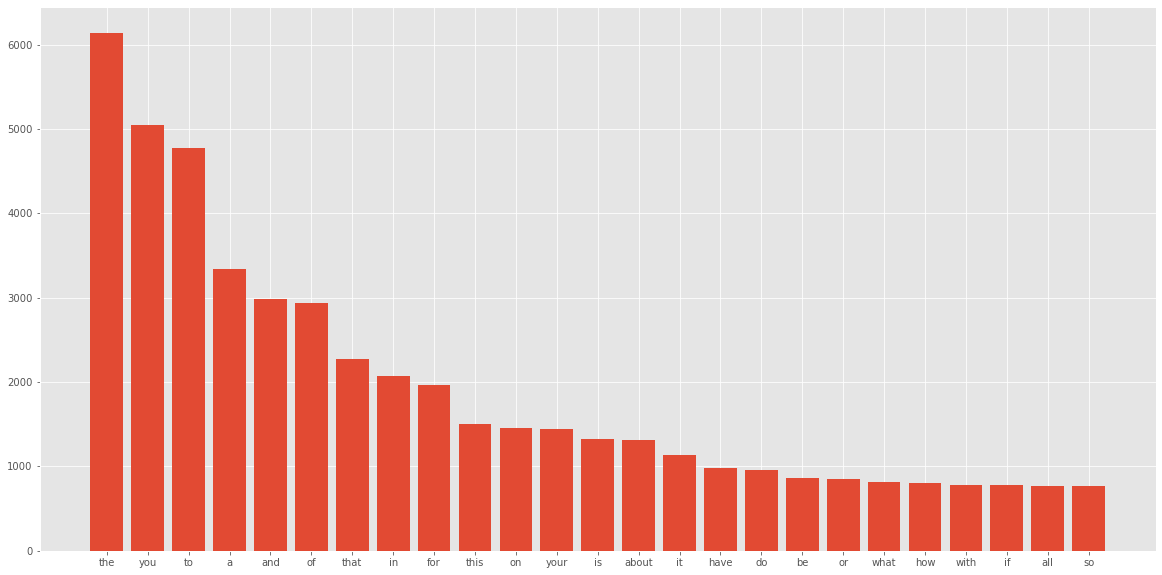

In [21]:
x,y=zip(*top)
plt.figure(figsize=(20,10))
plt.bar(x,y)


## Bi grams in words spoken by Sanyam

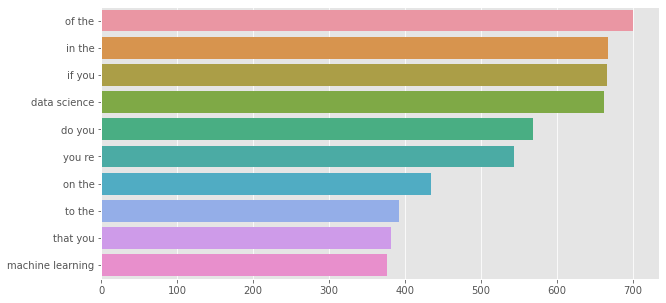

In [22]:
def get_top_word_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_word_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

plt.figure(figsize=(10,5))
top_tweet_bigrams=get_top_word_bigrams(host_subs['Text'])[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

## Trigrams spoken in words by Sanyam

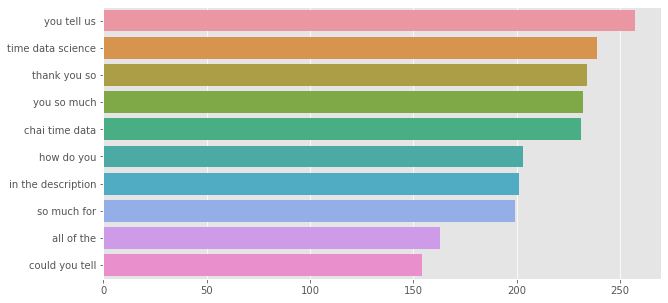

In [23]:
plt.figure(figsize=(10,5))
top_tweet_bigrams=get_top_word_trigrams(host_subs['Text'])[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

<div class=h3> Chai consumed by Sanyam during CTDS interviews</div>

In [24]:
import plotly.graph_objects as go

chai_df = ctds_episodes.flavour_of_tea.value_counts()
sunflowers_colors = ['rgb(177, 127, 38)', 'rgb(205, 152, 36)', 'rgb(99, 79, 37)',
                     'rgb(129, 180, 179)', 'rgb(124, 103, 37)']

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=chai_df.index, values=chai_df.values, hole=.3, marker_colors=sunflowers_colors)])
fig.show()

<div class=h1> Kaggle Journey of Sanyam</div>

Sanyam Bhutani is an active Kaggler himself, obviously inspired by overhelming majority of Kagglers he have interviewed so far. Sanyam himself is a 1X Kaggle Master and 2X Kaggle expert. Let's take a brief look at his Kaggle journey throughout the years which was possible only by [SRK's fabulous notebook](https://www.kaggle.com/sudalairajkumar/a-look-back-at-your-kaggle-journey).

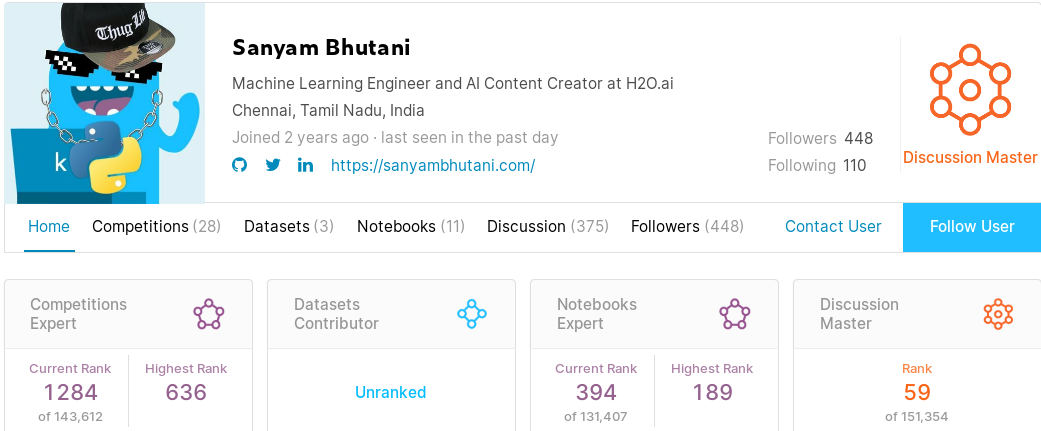

<div class=h3> Competition Journey</div>

In [25]:
# most of code is adoped from: https://www.kaggle.com/sudalairajkumar/a-look-back-at-your-kaggle-journey
user_name = 'init27'
users_df = pd.read_csv("../input/meta-kaggle/Users.csv")
followers_df = pd.read_csv('../input/meta-kaggle/UserFollowers.csv')
user_df = users_df[users_df["UserName"]==user_name]
user_id = user_df["Id"].values[0]
user_display = user_df["DisplayName"].values[0]
print("The user id for the given user name is : ",user_id)
print("The display name for the given user name is : ",user_display)

The user id for the given user name is :  1790018
The display name for the given user name is :  Sanyam Bhutani


In [26]:
followers_df[followers_df['UserId']==1790018].UserId.value_counts()

1790018    112
Name: UserId, dtype: int64

In [27]:
team_members_df = pd.read_csv("../input/meta-kaggle/TeamMemberships.csv")
team_df = pd.read_csv("../input/meta-kaggle/Teams.csv")
comp_df = pd.read_csv("../input/meta-kaggle/Competitions.csv")

temp_df = team_members_df[team_members_df["UserId"]==user_id]
temp_df = pd.merge(temp_df, team_df, left_on="TeamId", right_on="Id", how="left")
temp_df = pd.merge(temp_df, comp_df, left_on="CompetitionId", right_on="Id", how="left")
temp_df["DeadlineDate"] = pd.to_datetime(temp_df["DeadlineDate"], format="%m/%d/%Y %H:%M:%S")
temp_df["DeadlineYear"] = temp_df["DeadlineDate"].dt.year
temp_df["DeadlineDate"] = temp_df["DeadlineDate"].apply(lambda x: datetime.date(x.year,x.month,1))

temp_df = temp_df[~np.isnan(temp_df["PrivateLeaderboardRank"])]
temp_df.head()

def scatter_plot(cnt_srs, color):
    trace = go.Scatter(
        x=cnt_srs.index[::-1],
        y=cnt_srs.values[::-1],
        showlegend=False,
        marker=dict(
            color=color,
        ),
    )
    return trace

cnt_df = temp_df.groupby('DeadlineYear')['PrivateLeaderboardRank'].agg(["size", "mean", "min"])
cnt_srs = cnt_df["size"]
cnt_srs = cnt_srs.sort_index()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color="green",
    ),
)

layout = go.Layout(
    title='Count of competitions over years',
    font=dict(size=14),
    width=800,
    height=500,
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="TargetCount")


### Mean Private Rank ###
cnt_srs = cnt_df["mean"]
cnt_srs = cnt_srs.sort_index()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color="blue",
    ),
)

layout = go.Layout(
    title='Mean Rank over years',
    font=dict(size=14),
    width=800,
    height=500,
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="TargetCount")



### Best rank each year ###
cnt_srs = cnt_df["min"]
cnt_srs = cnt_srs.sort_index()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color="red",
    ),
)

layout = go.Layout(
    title='Best Rank in each year',
    font=dict(size=14),
    width=800,
    height=500,
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="TargetCount")


<div class=h3> Notebooks journey so far</div>

In [28]:
def bar_chart(cnt_srs, color):
    trace = go.Bar(
        x=cnt_srs.index,
        y=cnt_srs.values,
        showlegend=False,
        marker=dict(
            color=color,
        ),
    )
    return trace


kernels_df = pd.read_csv("../input/meta-kaggle/Kernels.csv")
temp_df = kernels_df[kernels_df["AuthorUserId"]==user_id]
temp_df["MadePublicDate"] = pd.to_datetime(temp_df["MadePublicDate"], format="%m/%d/%Y")
temp_df["MadePublicYear"] = temp_df["MadePublicDate"].dt.year
temp_df.head()

# Number of kernels
cnt_srs = temp_df["MadePublicYear"].value_counts()
traces = [bar_chart(cnt_srs, "blue")]
layout = go.Layout(
    title='Number of kernels in each year',
    font=dict(size=14),
    width=800,
    height=500,
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='stacked-bar')


# Number of views
cnt_srs = temp_df.groupby("MadePublicYear")["TotalViews"].mean()
traces = [bar_chart(cnt_srs, "green")]
layout = go.Layout(
    title='Mean number of views per kernel',
    font=dict(size=14),
    width=800,
    height=500,
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='stacked-bar')

# Number of votes
cnt_srs = temp_df.groupby("MadePublicYear")["TotalVotes"].mean()
traces = [bar_chart(cnt_srs, "red")]
layout = go.Layout(
    title='Mean number of votes per kernel',
    font=dict(size=14),
    width=800,
    height=500,
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='stacked-bar')



<div class=h3> Discussion Journey So far</div>

In [29]:
forum_message_df = pd.read_csv("../input/meta-kaggle/ForumMessages.csv")
temp_df = forum_message_df[forum_message_df["PostUserId"]==user_id]
temp_df["PostDate"] = pd.to_datetime(temp_df["PostDate"], format="%m/%d/%Y %H:%M:%S")
temp_df["PostYear"] = temp_df["PostDate"].dt.year
temp_df.head()



cnt_df = temp_df.pivot_table(index="PostYear", columns="Medal", values="PostUserId", aggfunc="count")
cnt_df = cnt_df.fillna(0)

def get_bar_chart(cnt_srs, name, color):
    trace = go.Bar(
        x=cnt_srs.index,
        y=cnt_srs.values,
        name=name,
        marker=dict(
            color=color,
        ),
    )
    return trace

medal_map = {1.:"Gold", 2.:"Silver", 3.:"Bronze"}
color_map = {1.:"gold", 2.:"silver", 3.:"darkorange"}
traces = []
for col in np.array(cnt_df.columns)[::-1]:
    cnt_srs = cnt_df[col]
    traces.append(get_bar_chart(cnt_srs, medal_map[col], color_map[col]))

layout = go.Layout(
    title='Discussion Medals in each year',
    font=dict(size=14),
    barmode='stack',
    width=800,
    height=500,
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='stacked-bar')

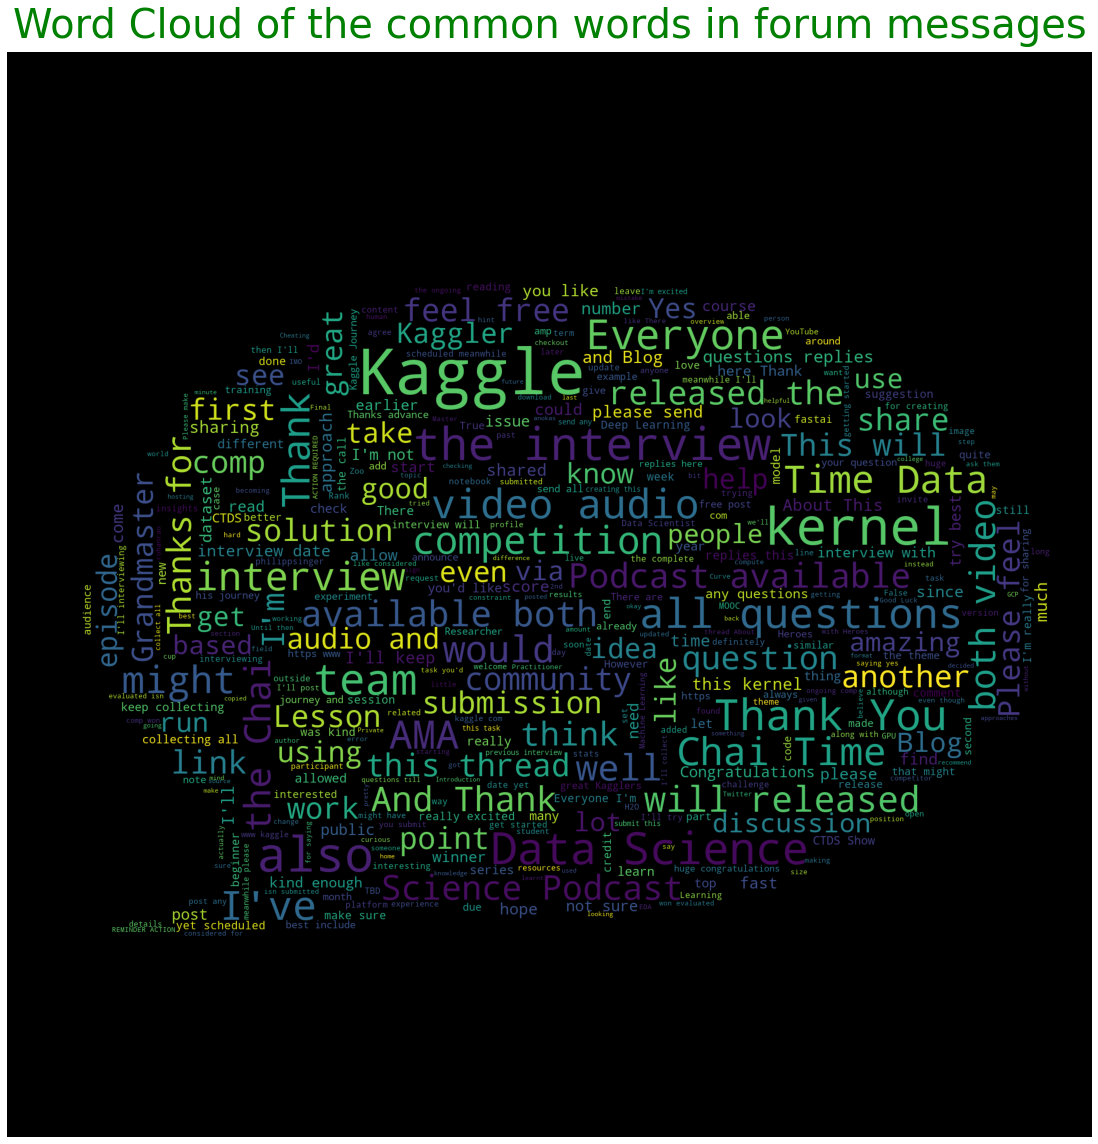

In [30]:
import re
def clean_string(txt):
    txt = str(txt)
    txt = re.sub("<.*?>", "", txt)
    txt = re.sub(' +', ' ', txt)
    return txt

temp_df["Message"] = temp_df["Message"].apply(lambda x: clean_string(x))
#temp_df.head()
text = " ".join(temp_df["Message"])


sanyam_array = np.array(Image.open(d+'comment.png'))
plot_wordcloud(text, sanyam_array, title="Word Cloud of the common words in forum messages")

<div class=h2>When were the episode being recorded❓</div>

In [31]:
df = ctds_episodes.recording_time.value_counts()
sunflowers_colors = ['rgb(177, 127, 38)', 'rgb(205, 152, 36)', 'rgb(99, 79, 37)',
                     'rgb(129, 180, 179)', 'rgb(124, 103, 37)']

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=df.index, values=df.values, hole=.3, marker_colors=sunflowers_colors)])
fig.show()

In [32]:
fig = px.bar(ctds_episodes,x = "heroes_location",color = 'recording_time', title="Bar_Graph : Recording Time Analysis")
fig.show()

From the above chart it's clear most of the interviews happend at Night time in India. Yet if you look at the locations and their local times there are a few interesting patterns:
- Most of the heroes prefer having interviews setup at **morning in their local time**.
- It seems a few heroes like Ryan Chesler, Amo Candel had a late night interview at their local time
- Our host has sacrificied his nights for atleast 45% of the entire episodes.

<div class=h3> Acknowledgments</div>

- https://www.kaggle.com/aashita/word-clouds-of-various-shapes
- https://www.kaggle.com/shahules/basic-eda-cleaning-and-glove